In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyelsa as elsa
from reconstruction import XrayOperator, rebin_fan2par, fbp_fan, bpf_fan
from skimage.transform import radon, iradon,rescale

pyelsa not build with CUDA projector support


[2023-12-25 23:54:19.815] [phantom::modifiedSheppLogan] [info] creating modified Shepp Logan phantom of size 128^2
[2023-12-25 23:54:19.820] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 128 poses in an 360 degree arc
[2023-12-25 23:54:19.822] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 128 poses in an 360 degree arc


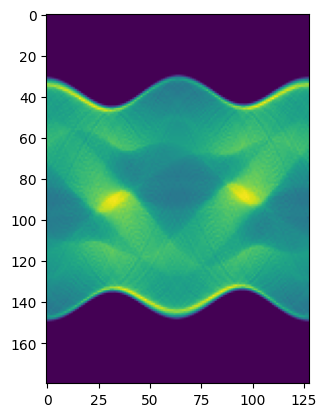

In [40]:
size = np.array([128, 128])
phantom = np.rot90(elsa.phantoms.modifiedSheppLogan(size), -1)

num_angles = 128
arc = 360

s2c = size[0] * 100
c2d = size[0] 
sd = s2c + c2d

projector1 = rebin_fan2par.RebinFan2Par(size, [180], np.linspace(0, arc, num_angles), s2c, c2d, cor_offset=[0,0],pp_offset=[0])
projector2 = fbp_fan.Fbp_fan(size, [175], np.linspace(0, arc, num_angles), s2c, c2d, cor_offset=[0,0],pp_offset=[0])

sino = projector1.apply(phantom)

plt.imshow(sino)


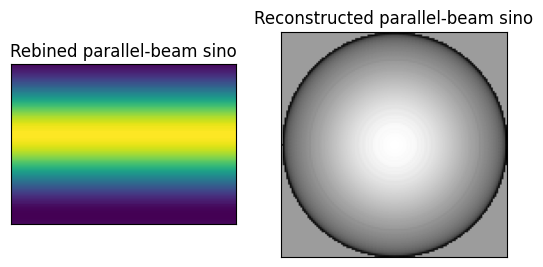

In [5]:
psino = projector1.rebin_fan2par(sino)
recon = iradon(psino[:,:,0].T, np.linspace(0, arc, 180))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(psino[:,:,0].T)
ax1.set_title("Rebined parallel-beam sino")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(recon, cmap="gray")
ax2.set_title("Reconstructed parallel-beam sino")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

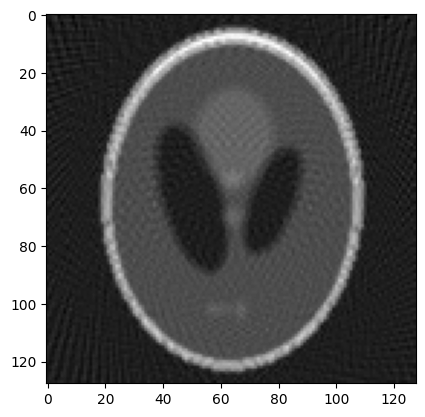

In [4]:
img2 = projector2.applyAdjoint(sino)
plt.imshow(img2.T, cmap='gray')

[2023-12-25 20:32:05.631] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 128 poses in an 360 degree arc


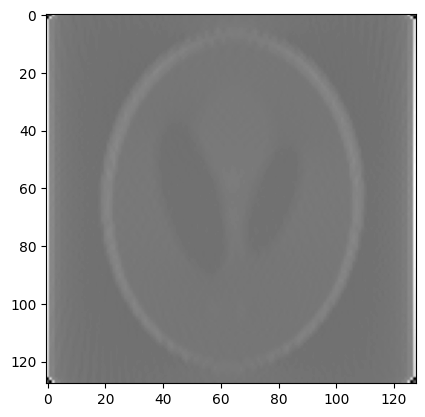

In [7]:
projector3 = bpf_fan.Bpf_fan(size, [175], np.linspace(0, arc, num_angles), s2c, c2d, cor_offset=[0,0],pp_offset=[0])
img3 = projector3.applyAdjoint(sino)
plt.imshow(img3.T, cmap='gray')

[2023-12-26 00:10:41.452] [phantom::modifiedSheppLogan] [info] creating modified Shepp Logan phantom of size 128^2
[2023-12-26 00:10:41.458] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 180 poses in an 120 degree arc
parker weight used
weight:  [[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.86929811e-07
  1.82764878e-07 1.78715296e-07]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.86929568e-07
  1.82764642e-07 1.78715066e-07]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.86929324e-07
  1.82764405e-07 1.78714835e-07]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.86886686e-07
  1.82722951e-07 1.78674527e-07]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.86886443e-07
  1.82722714e-07 1.78674296e-07]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.86886199e-07
  1.82722477e-07 1.78674066e-07]]


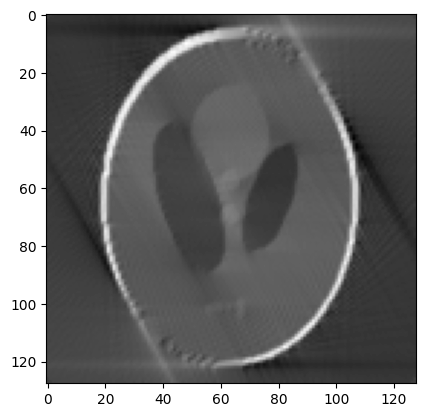

In [2]:
size = np.array([128, 128])
phantom = np.rot90(elsa.phantoms.modifiedSheppLogan(size), -1)

num_angles = 180
arc = 120

s2c = size[0] * 100
c2d = size[0] 
sd = s2c + c2d

projector4 = fbp_fan.Fbp_fan(size, [180], np.linspace(0, arc, num_angles), s2c, c2d, cor_offset=[0,0],pp_offset=[0],weighting="parker")
sino4 = projector4.apply(phantom)
img4 = projector4.applyAdjoint(sino4)
plt.imshow(img4.T, cmap='gray')


[2023-12-26 00:10:43.635] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 180 poses in an 120 degree arc
weight:  [[0.99007528 0.99007528 0.99007528 ... 0.99007528 0.99007528 0.99007528]
 [0.99007581 0.99007581 0.99007581 ... 0.99007581 0.99007581 0.99007581]
 [0.99007633 0.99007633 0.99007633 ... 0.99007633 0.99007633 0.99007633]
 ...
 [0.99007633 0.99007633 0.99007633 ... 0.99007633 0.99007633 0.99007633]
 [0.99007581 0.99007581 0.99007581 ... 0.99007581 0.99007581 0.99007581]
 [0.99007528 0.99007528 0.99007528 ... 0.99007528 0.99007528 0.99007528]]


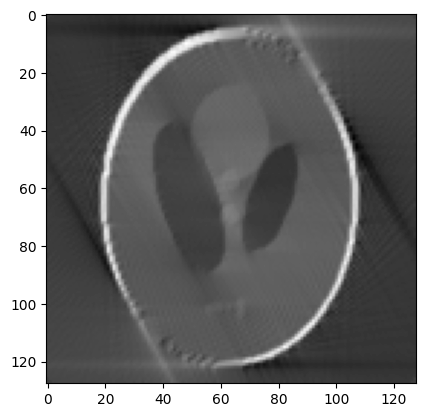

In [3]:
projector5 = fbp_fan.Fbp_fan(size, [180], np.linspace(0, arc, num_angles), s2c, c2d, cor_offset=[0,0],pp_offset=[0],weighting="normal")
sino5 = projector5.apply(phantom)
img5 = projector5.applyAdjoint(sino5)
plt.imshow(img5.T, cmap='gray')


[2023-12-26 00:04:35.750] [phantom::modifiedSheppLogan] [info] creating modified Shepp Logan phantom of size 128^2
[2023-12-26 00:04:35.756] [CircleTrajectoryGenerator] [info] creating 2D trajectory with 100 poses in an 120 degree arc


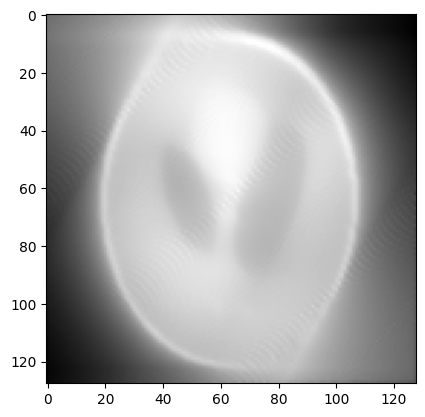

In [62]:
size = np.array([128, 128])
phantom = np.rot90(elsa.phantoms.modifiedSheppLogan(size), -1)

num_angles = 100
arc = 120

s2c = size[0] * 100
c2d = size[0] 
sd = s2c + c2d

projector = XrayOperator.XrayOperator(size, [180], np.linspace(0, arc, num_angles), s2c, c2d)
sino = projector.apply(phantom)
img = projector.applyAdjoint(sino)
plt.imshow(img, cmap='gray')


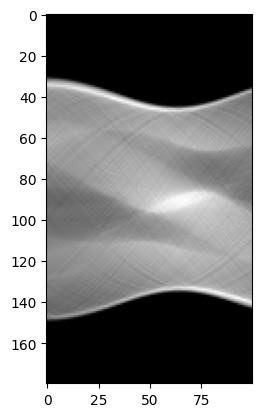

In [39]:
plt.imshow(sino, cmap='gray')